# Defining a function to download data


In [105]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import tarfile
from six.moves import urllib

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# to make this notebook's output stable across runs
np.random.seed(2019)


# Get the data

In [106]:
home = str(Path.home())
data = os.path.join(home, "Analysis","Data")
if not os.path.exists(data):
    os.makedirs(data, exists_ok = True)

    
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join(data, "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()
# fetching data
fetch_housing_data()

# A function to load data

In [107]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# A quick look at the data structure

In [108]:
housing = load_housing_data()
housing.iloc[np.r_[0:10, -10:0]] # head and tail of housing data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [109]:
housing.info()
#housing.columns # col names
#finding categories with value_count()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [110]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [111]:
housing.describe() # summmaries for numeric cols

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute

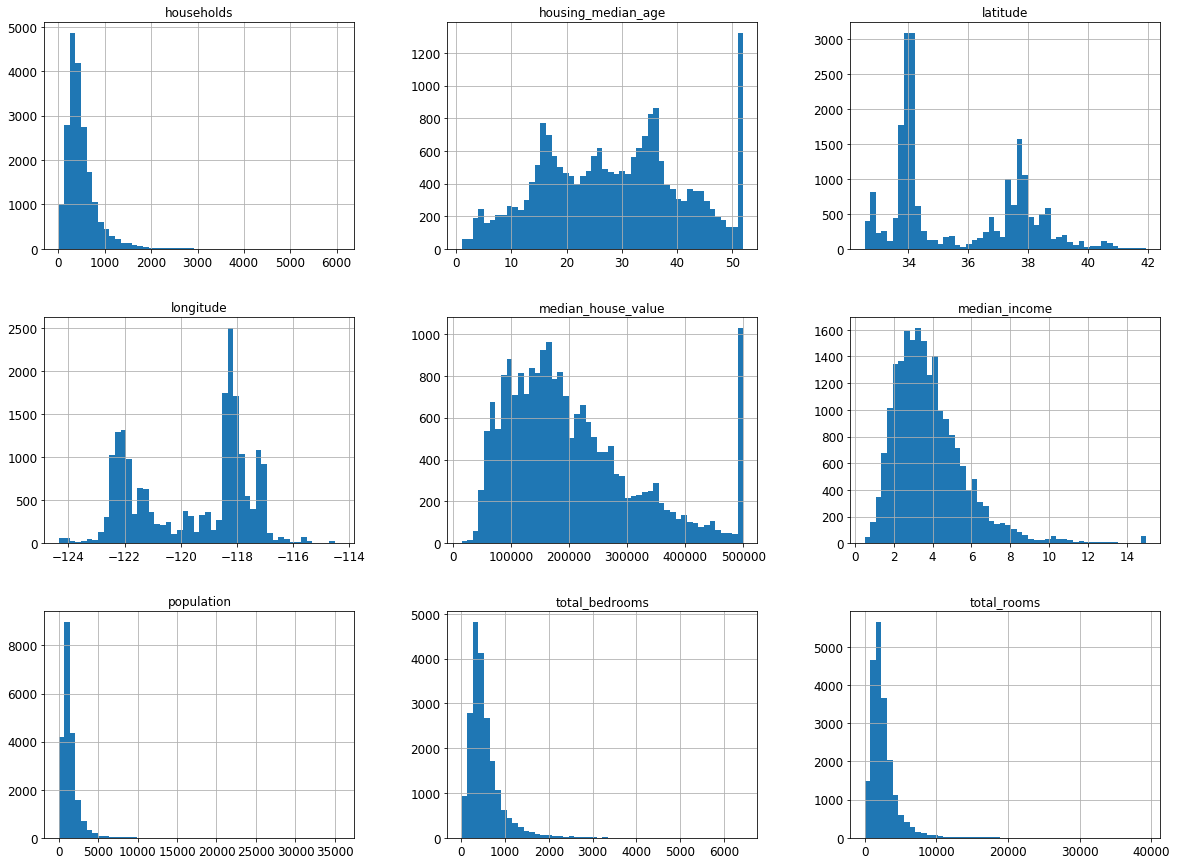

In [112]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

# create test set

In [113]:
np.random.seed(2019)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
len(test_set)

4128

This works but will break whenever new data is fetched. A common solution is to use 
each instance's identifier to decide whether or not it goes to test set.

In [114]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed,
which supported any hash function, but was much slower and did not support python 2.

In [115]:
import hashlib

def test_set_check(identifier, test_ratio, hash = hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3:

In [116]:
def test_set_check(identifier, test_ratio, hash = hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

You can use raw indices if data lacks id column

In [117]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12084,-117.33,33.90,2.0,12837.0,1842.0,4636.0,1453.0,5.1512,187800.0,INLAND
17330,-120.09,34.61,11.0,586.0,125.0,317.0,74.0,2.8906,84400.0,NEAR OCEAN
10777,-117.91,33.65,24.0,885.0,321.0,590.0,254.0,2.6250,217900.0,<1H OCEAN
1394,-122.07,37.99,28.0,3310.0,574.0,1811.0,597.0,4.5401,166900.0,NEAR BAY
12830,-121.43,38.69,28.0,927.0,165.0,542.0,148.0,2.5000,96200.0,INLAND


In [118]:
housing_with_id = housing.reset_index() # adds an idex col
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [119]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
20,20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


Scikit-Learn provides `train_test_split`, with  a `random_state` parameter that
allows you to set the random generator seed.

In [120]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 2019)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12084,-117.33,33.90,2.0,12837.0,1842.0,4636.0,1453.0,5.1512,187800.0,INLAND
17330,-120.09,34.61,11.0,586.0,125.0,317.0,74.0,2.8906,84400.0,NEAR OCEAN
10777,-117.91,33.65,24.0,885.0,321.0,590.0,254.0,2.6250,217900.0,<1H OCEAN
1394,-122.07,37.99,28.0,3310.0,574.0,1811.0,597.0,4.5401,166900.0,NEAR BAY
12830,-121.43,38.69,28.0,927.0,165.0,542.0,148.0,2.5000,96200.0,INLAND


 creating categories of medium income

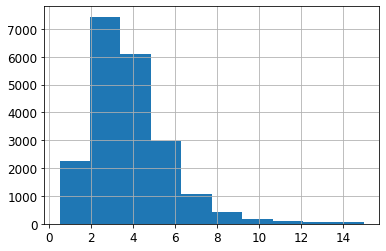

In [121]:
housing["median_income"].hist()

In [122]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])


In [123]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

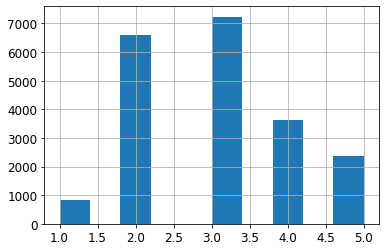

In [124]:
housing["income_cat"].hist()

Now you can do a stratified sampling

In [125]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2, random_state = 2019)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's see if this worked by looking at income category proportions in test set

In [126]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [127]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)
train_Set, test_set = train_test_split(housing, test_size = 0.2, random_state = 2019)
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [128]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.044816,12.530414,-0.243309
2,0.318847,0.318798,0.317829,-0.319100,-0.015195
3,0.350581,0.350533,0.351986,0.400774,-0.013820
4,0.176308,0.176357,0.172965,-1.896125,0.027480
5,0.114438,0.114583,0.112403,-1.778154,0.127011


In [129]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

# Discover and visualize to gain insights

In [130]:
housing = strat_train_set.copy()

Saving figure bad_visualization_plot


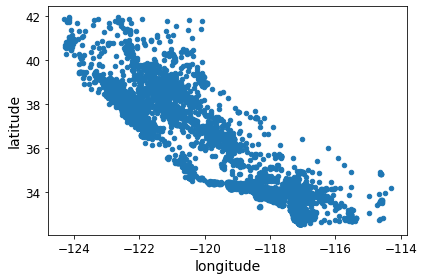

In [131]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")
save_fig("bad_visualization_plot")

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points

Saving figure better_visualization_plot


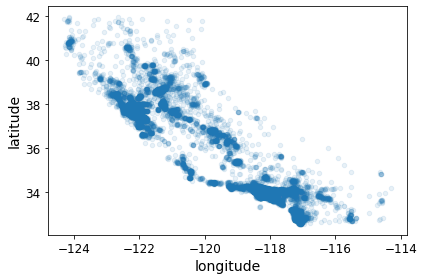

In [132]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611 ). Thanks to Wilmer Arellano for pointing it out.

Saving figure housing_prices_scatterplot


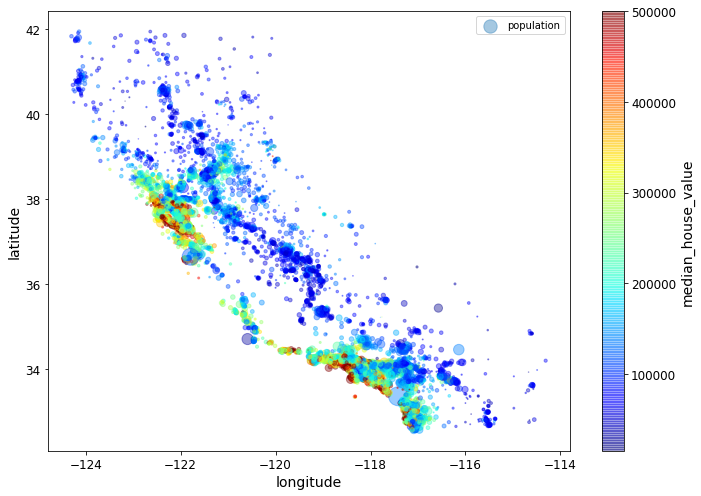

In [133]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"] / 100, label = "population", figsize = (10, 7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
            sharex = False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [134]:
corr_matrix = housing.corr()

In [135]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687894
total_rooms           0.135763
housing_median_age    0.108102
households            0.067783
total_bedrooms        0.050826
population           -0.024467
longitude            -0.049271
latitude             -0.139948
Name: median_house_value, dtype: float64

Scatter matrix plot

Saving figure scatter_matrix_plot


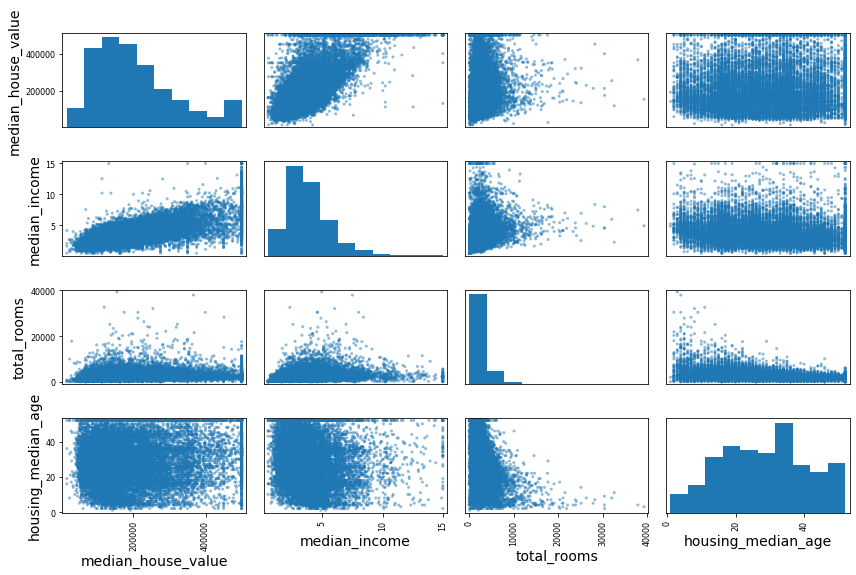

In [136]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", 
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


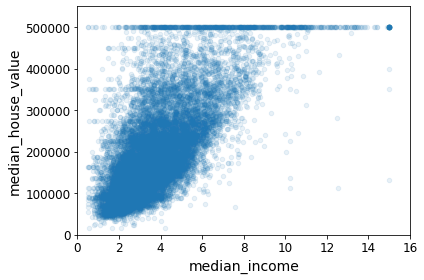

In [137]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [138]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [139]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687894
rooms_per_household         0.146690
total_rooms                 0.135763
housing_median_age          0.108102
households                  0.067783
total_bedrooms              0.050826
population                 -0.024467
population_per_household   -0.025585
longitude                  -0.049271
latitude                   -0.139948
bedrooms_per_room          -0.253689
Name: median_house_value, dtype: float64

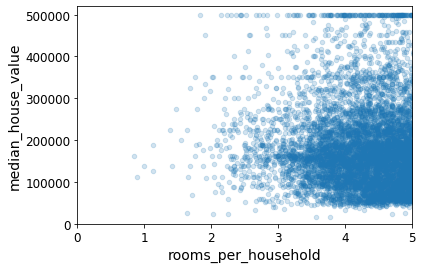

In [140]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [141]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16351.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16351.000000,16512.000000
mean,-119.559786,35.620624,28.673207,2628.431504,536.196379,1421.014232,498.155705,3.875712,206654.419876,5.433654,0.212855,3.019936
std,2.002803,2.129588,12.580869,2160.464552,416.087766,1126.399384,376.446263,1.910775,115351.045304,2.570995,0.057838,9.721601
min,-124.300000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.790000,33.930000,18.000000,1451.750000,297.000000,791.750000,281.000000,2.564300,119900.000000,4.444444,0.175354,2.429097
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1166.000000,409.000000,3.539550,180000.000000,5.236842,0.202963,2.819702
75%,-118.010000,37.710000,37.000000,3143.000000,645.000000,1723.250000,604.000000,4.740400,263800.000000,6.047619,0.239838,3.282862
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Preparing Data for Machine Learning algorithms

In [142]:
housing = strat_train_set.drop("median_house_value", axis = 1)
#drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

Get incompleter rows

In [143]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN
14173,-117.05,32.75,36.0,2024.0,NaN,1030.0,390.0,3.8233,NEAR OCEAN
6814,-118.07,34.10,32.0,4275.0,NaN,2812.0,1012.0,3.3512,<1H OCEAN
16330,-121.33,38.02,31.0,1466.0,NaN,608.0,254.0,3.1827,INLAND
10428,-117.64,33.45,26.0,1528.0,NaN,607.0,218.0,6.2871,NEAR OCEAN


Drop rows missing `total_bedrooms`

In [144]:
sample_incomplete_rows.dropna(subset = ["total_bedrooms"]) #option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [145]:
sample_incomplete_rows.drop("total_bedrooms", axis = 1) # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
11512,-118.10,33.74,32.0,2035.0,934.0,512.0,4.2287,NEAR OCEAN
14173,-117.05,32.75,36.0,2024.0,1030.0,390.0,3.8233,NEAR OCEAN
6814,-118.07,34.10,32.0,4275.0,2812.0,1012.0,3.3512,<1H OCEAN
16330,-121.33,38.02,31.0,1466.0,608.0,254.0,3.1827,INLAND
10428,-117.64,33.45,26.0,1528.0,607.0,218.0,6.2871,NEAR OCEAN


replace rows missing `total_bedrooms with median of `total_bedrooms

In [146]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)

In [147]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11512,-118.10,33.74,32.0,2035.0,434.0,934.0,512.0,4.2287,NEAR OCEAN
14173,-117.05,32.75,36.0,2024.0,434.0,1030.0,390.0,3.8233,NEAR OCEAN
6814,-118.07,34.10,32.0,4275.0,434.0,2812.0,1012.0,3.3512,<1H OCEAN
16330,-121.33,38.02,31.0,1466.0,434.0,608.0,254.0,3.1827,INLAND
10428,-117.64,33.45,26.0,1528.0,434.0,607.0,218.0,6.2871,NEAR OCEAN


Using `SimpleImputer`

In [148]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

Remove the text attribute because median can only be calculated on numeric attributes

In [149]:
housing_num = housing.select_dtypes(include=[np.number])
# alternatively: housing_num = housing.drop("ocean_proximity", axis = 1)

In [150]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [151]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  434.     ,
       1166.     ,  409.     ,    3.53955])

check that this is simailar to manually computing the median of each attribute:

In [152]:
housing_num.median().values

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  434.     ,
       1166.     ,  409.     ,    3.53955])

Transform the training set

In [153]:
X = imputer.transform(housing_num)

In [154]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                         index = housing.index)

In [155]:
housing_tr.iloc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17441,-120.45,34.66,7.0,3329.0,504.0,1462.0,452.0,4.7875
3393,-118.31,34.27,35.0,1446.0,274.0,759.0,291.0,6.0808
9751,-121.70,36.60,19.0,3562.0,530.0,1607.0,505.0,5.0162
1998,-119.77,36.75,39.0,1287.0,332.0,1386.0,306.0,1.5227
14457,-117.27,32.82,35.0,2908.0,595.0,1068.0,529.0,4.1793


In [156]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
6341,-117.90,33.97,23.0,7353.0,1255.0,4014.0,1124.0,5.4155
18164,-122.03,37.36,16.0,2697.0,803.0,1369.0,723.0,4.4699
7250,-118.12,33.99,26.0,2296.0,534.0,1777.0,507.0,2.5395
2881,-118.99,35.38,26.0,1317.0,374.0,1025.0,304.0,1.4024
9353,-122.56,37.95,34.0,2677.0,411.0,933.0,410.0,6.1444


Now let's process the categorical input feature `ocean_proximity` 
using `OrdinalEncoder`

In [157]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
6341,<1H OCEAN
18164,<1H OCEAN
7250,<1H OCEAN
2881,INLAND
9353,NEAR OCEAN
10809,<1H OCEAN
3606,<1H OCEAN
13883,INLAND
18752,INLAND
7985,<1H OCEAN


In [158]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encorder = OrdinalEncoder()
housing_cat_encoded = ordinal_encorder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [159]:
ordinal_encorder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [160]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, `oneHotEncoder` class returns a parse array, but we can convert it
to a dense array if needed by calling the `toarray()` method

In [161]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Alternatively, you can set `sparse = False` when creating the `OneHotEncoder`:

In [162]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [163]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attributes

In [176]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [177]:
housing_extra_attribs = pd.DataFrame(
housing_extra_attribs,
columns = list(housing.columns) + ["rooms_per_household", "population_per_household"],
index= housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
6341,-117.9,33.97,23,7353,1255,4014,1124,5.4155,<1H OCEAN,6.54181,3.57117
18164,-122.03,37.36,16,2697,803,1369,723,4.4699,<1H OCEAN,3.73029,1.8935
7250,-118.12,33.99,26,2296,534,1777,507,2.5395,<1H OCEAN,4.5286,3.50493
2881,-118.99,35.38,26,1317,374,1025,304,1.4024,INLAND,4.33224,3.37171
9353,-122.56,37.95,34,2677,411,933,410,6.1444,NEAR OCEAN,6.52927,2.27561


Now let's build a pipeline for processing the numeric attributes

In [180]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [181]:
housing_num_tr

array([[ 8.28756577e-01, -7.75114041e-01, -4.50952867e-01, ...,
         4.31037327e-01,  5.67041564e-02, -6.59828383e-01],
       [-1.23341542e+00,  8.16791163e-01, -1.00737005e+00, ...,
        -6.62550857e-01, -1.15872963e-01,  1.29533369e+00],
       [ 7.18907221e-01, -7.65722270e-01, -2.12488359e-01, ...,
        -3.52035528e-01,  4.98899066e-02,  2.92670087e-01],
       ...,
       [ 9.58578543e-01, -8.17377011e-01, -1.24583456e+00, ...,
         2.66644623e-01, -2.60083222e-03, -6.62010453e-01],
       [ 1.25317454e+00, -1.16956843e+00, -9.27881883e-01, ...,
         4.00542250e-01,  1.01574871e-03, -8.86086750e-01],
       [-1.57794295e+00,  1.26290029e+00, -2.12488359e-01, ...,
         8.39508988e-02, -2.75023295e-02, -5.34364585e-01]])

In [185]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [186]:
housing_prepared

array([[ 0.82875658, -0.77511404, -0.45095287, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23341542,  0.81679116, -1.00737005, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71890722, -0.76572227, -0.21248836, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.95857854, -0.81737701, -1.24583456, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25317454, -1.16956843, -0.92788188, ...,  0.        ,
         0.        ,  0.        ],
       [-1.57794295,  1.26290029, -0.21248836, ...,  0.        ,
         0.        ,  0.        ]])

In [188]:
housing_prepared.shape

(16512, 16)

For reference here is the old solution based on a `DataFrameSelector` transformer 
(to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [189]:
from sklearn.base import BaseEstimator, TransformerMixin

# Creare a class to select numerical or categorical columns
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the
numerical and the categorical features:

In [191]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

old_num_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector', OldDataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

In [194]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', old_num_pipeline),
    ('cat_pipeline', old_cat_pipeline),
])

In [196]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[ 0.82875658, -0.77511404, -0.45095287, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23341542,  0.81679116, -1.00737005, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71890722, -0.76572227, -0.21248836, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.95857854, -0.81737701, -1.24583456, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25317454, -1.16956843, -0.92788188, ...,  0.        ,
         0.        ,  0.        ],
       [-1.57794295,  1.26290029, -0.21248836, ...,  0.        ,
         0.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`

In [197]:
np.allclose(housing_prepared, old_housing_prepared)

True

# Select and train a Model

In [200]:
from sklearn.linear_model import  LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [205]:
# Let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))

predictions: [245960.31610888 292490.77823644 154099.44296226  70422.65836233
 338738.3187207 ]


Compare against the actual values:

In [206]:
print("Labels:", list(some_labels))

Labels: [213200.0, 367400.0, 191000.0, 51000.0, 500001.0]


In [214]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68360.8339464442

In [271]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

0.0

## DecisionTreeRegressor

In [220]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2019)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2019, splitter='best')

In [224]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [269]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [267]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66020.5668412  72592.64009805 66428.10814121 65231.70159012
 70083.90828946 70959.66791714 65906.37461075 70009.71713928
 69789.84778313 73168.16520316]
Mean: 69019.06976135109
Standard deviation: 2760.395114113434


In [270]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring= "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 71230.53638619  69032.42995075  64644.30280048  66387.15801595
  68725.62382941  69510.31772255 167862.9275278   68782.88789425
  68863.21262651  71512.78771652]
Mean: 78655.2184470412
Standard deviation: 29797.88088000139


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

## RandomForestRegressor

In [275]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=2019)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=2019,
                      verbose=0, warm_start=False)

In [281]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18340.61071879925

In [286]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv= 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47816.40342585 50273.75189816 47708.31240451 47647.34009706
 51261.03017898 50546.36926606 49757.63796505 50960.90253546
 49254.64759541 51998.84146172]
Mean: 49722.52368282734
Standard deviation: 1492.7039428719793


In [288]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring = "neg_mean_squared_error", cv = 10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      78655.218447
std       31409.724342
min       64644.302800
25%       68739.939846
50%       68947.821289
75%       70800.481720
max      167862.927528
dtype: float64

## Support Vector Regression 

In [293]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110588.56395498395

## GridSearch

In [296]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3x4) combination of parameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2x3) combination with bootstrap set at False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    
]

forest_reg = RandomForestRegressor(random_state=2019)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring='neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2019,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


The best hyperparameter combination found:

In [297]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [298]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=2019,
                      verbose=0, warm_start=False)

Let'slook at the score for each hyperparameter combination tested during the
grid search

In [299]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64451.02374334613 {'max_features': 2, 'n_estimators': 3}
55218.225483729104 {'max_features': 2, 'n_estimators': 10}
52546.37226469922 {'max_features': 2, 'n_estimators': 30}
60871.798955900624 {'max_features': 4, 'n_estimators': 3}
52187.199978266406 {'max_features': 4, 'n_estimators': 10}
49924.198860693556 {'max_features': 4, 'n_estimators': 30}
58590.818285546586 {'max_features': 6, 'n_estimators': 3}
51191.08064590097 {'max_features': 6, 'n_estimators': 10}
49348.286319981045 {'max_features': 6, 'n_estimators': 30}
57908.94102743235 {'max_features': 8, 'n_estimators': 3}
51613.26820929848 {'max_features': 8, 'n_estimators': 10}
49695.22871091473 {'max_features': 8, 'n_estimators': 30}
63057.646927640584 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54200.67394874731 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60205.27015417971 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52332.70377821929 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [300]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.138317,0.009769,0.005610,0.001952,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.923359e+09,-3.869859e+09,-4.573294e+09,-4.391373e+09,-4.011943e+09,-4.153934e+09,2.779420e+08,18,-1.099074e+09,-1.087574e+09,-1.183185e+09,-1.151126e+09,-1.095143e+09,-1.123220e+09,3.746073e+07
1,0.452898,0.003251,0.016958,0.001346,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.922595e+09,-2.707317e+09,-3.256256e+09,-3.226962e+09,-3.132274e+09,-3.049052e+09,2.070267e+08,11,-5.632042e+08,-5.615736e+08,-5.641363e+08,-5.639352e+08,-5.771206e+08,-5.659940e+08,5.635837e+06
2,1.358123,0.008123,0.053195,0.002415,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.630022e+09,-2.486068e+09,-2.929041e+09,-2.908556e+09,-2.852042e+09,-2.761121e+09,1.738113e+08,9,-4.244609e+08,-4.303078e+08,-4.203268e+08,-4.253217e+08,-4.185349e+08,-4.237904e+08,4.120374e+06
3,0.210525,0.008092,0.008022,0.002167,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.437851e+09,-3.463243e+09,-3.688154e+09,-3.995865e+09,-3.941921e+09,-3.705376e+09,2.327395e+08,16,-9.270726e+08,-9.671748e+08,-9.646100e+08,-9.418862e+08,-9.464519e+08,-9.494391e+08,1.490600e+07
4,0.705895,0.007686,0.017463,0.001541,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.536054e+09,-2.499319e+09,-2.813023e+09,-2.882332e+09,-2.886916e+09,-2.723504e+09,1.704980e+08,7,-4.899058e+08,-5.127817e+08,-4.984428e+08,-4.969761e+08,-4.925702e+08,-4.981353e+08,7.932859e+06
5,2.134560,0.057198,0.050283,0.003642,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.401905e+09,-2.277839e+09,-2.576691e+09,-2.580861e+09,-2.624924e+09,-2.492426e+09,1.317001e+08,3,-3.839371e+08,-3.886881e+08,-3.743457e+08,-3.743578e+08,-3.703032e+08,-3.783264e+08,6.852908e+06
6,0.285790,0.009258,0.005913,0.002037,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.395616e+09,-3.214616e+09,-3.493935e+09,-3.542487e+09,-3.517844e+09,-3.432884e+09,1.199951e+08,13,-9.239532e+08,-9.031686e+08,-9.032902e+08,-8.944071e+08,-9.013037e+08,-9.052246e+08,9.910818e+06
7,0.965583,0.013620,0.020050,0.001242,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.469330e+09,-2.430059e+09,-2.771594e+09,-2.680799e+09,-2.750955e+09,-2.620527e+09,1.432548e+08,4,-4.855546e+08,-5.062616e+08,-4.678677e+08,-4.765647e+08,-4.890966e+08,-4.850690e+08,1.291348e+07
8,2.889624,0.038099,0.049567,0.002980,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.340414e+09,-2.228163e+09,-2.550962e+09,-2.544505e+09,-2.512314e+09,-2.435253e+09,1.289567e+08,1,-3.714429e+08,-3.828791e+08,-3.562458e+08,-3.657371e+08,-3.665461e+08,-3.685702e+08,8.683469e+06
9,0.382576,0.014382,0.007433,0.001312,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.231341e+09,-3.095320e+09,-3.463406e+09,-3.349523e+09,-3.627752e+09,-3.353445e+09,1.837899e+08,12,-8.854741e+08,-8.661748e+08,-9.176447e+08,-8.888417e+08,-8.593535e+08,-8.834978e+08,2.040346e+07


In [306]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=2019)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter = 10, cv = 5, scoring="neg_mean_squared_error",
                               random_state=4)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [309]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49859.51649963785 {'max_features': 3, 'n_estimators': 175}
48839.82330667865 {'max_features': 6, 'n_estimators': 130}
54499.91871028076 {'max_features': 1, 'n_estimators': 88}
55146.61914043329 {'max_features': 1, 'n_estimators': 51}
52050.2251259432 {'max_features': 2, 'n_estimators': 59}
48996.55050608459 {'max_features': 5, 'n_estimators': 104}
48968.393799279016 {'max_features': 6, 'n_estimators': 95}
51710.56742105836 {'max_features': 2, 'n_estimators': 105}
48814.32872096741 {'max_features': 5, 'n_estimators': 179}
49683.65305461854 {'max_features': 5, 'n_estimators': 39}


In [311]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.80118889e-02, 7.09220840e-02, 4.35940949e-02, 1.72325969e-02,
       1.65508371e-02, 1.78331503e-02, 1.59298370e-02, 3.34469709e-01,
       5.15937632e-02, 1.06969857e-01, 7.60957088e-02, 1.88747182e-02,
       1.42770712e-01, 2.67522715e-04, 4.31455471e-03, 4.56896530e-03])

Extra attributes

In [313]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_iportances, attributes), reverse = True)

[(0.33446970918429003, 'median_income'),
 (0.14277071231976293, 'INLAND'),
 (0.10696985661074922, 'pop_per_hhold'),
 (0.07801188886133711, 'longitude'),
 (0.07609570881022078, 'bedrooms_per_room'),
 (0.0709220839558038, 'latitude'),
 (0.0515937632248558, 'rooms_per_hhold'),
 (0.04359409486935603, 'housing_median_age'),
 (0.01887471818170782, '<1H OCEAN'),
 (0.017833150286934094, 'population'),
 (0.017232596862126408, 'total_rooms'),
 (0.0165508371096964, 'total_bedrooms'),
 (0.01592983699516395, 'households'),
 (0.004568965299859614, 'NEAR OCEAN'),
 (0.004314554713144752, 'NEAR BAY'),
 (0.00026752271499131086, 'ISLAND')]

In [320]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [321]:
final_rmse

49944.95389652949

We can complete a 95% confidence interval for the test RMSE:

In [323]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) **2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([47676.17214882, 52115.05971107])

We could compute the interval manually like this:

In [324]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(47676.17214882207, 52115.059711073874)

Alternatively, we could use a z-score rather than t-score

In [327]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(47676.853359839, 52114.43651386169)

# Extra Material

## A full pipeline with both preparation and prediction

In [331]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
    
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([245960.31610888, 292490.77823644, 154099.44296226,  70422.65836233,
       338738.3187207 ])

## Model persistence using joblib

In [333]:
my_model = full_pipeline_with_predictor

In [336]:
import joblib

joblib.dump(my_model, "my_model.pkl") #DIFF
#...
my_model_loaded= joblib.load("my_model.pkl") #DIFF

## Example SciPy distributions for RandomizedSearchCV

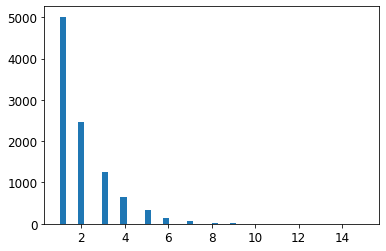

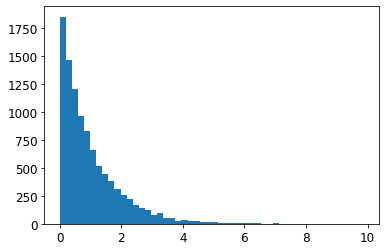

In [342]:
from scipy.stats import geom, expon

geom_distrib = geom(0.5).rvs(10000, random_state = 2019)
expon_distrib = expon(scale=1).rvs(10000, random_state = 2019)
plt.hist(geom_distrib, bins = 50)
plt.show()
plt.hist(expon_distrib, bins = 50)
plt.show()

# Exercises

### 1: Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters
such as kernel="linear" (with various values for the C hyperparameter)
or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [347]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   6.9s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   6.7s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.6s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   6.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   7.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   6.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   7.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   7.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[CV] ..................... C=1.0, gamma=0.3, kernel=rbf, total=  10.7s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  10.5s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  10.5s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  10.3s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  10.4s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=1.0, kernel=rbf, total=  10.3s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=3.0, kernel=rbf, total=  11.3s
[CV] C=1.0, gamma=3.0, kernel=rbf ....................................
[CV] .

[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=  10.7s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=  10.5s
[CV] C=10.0, gamma=0.3, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.3, kernel=rbf, total=  10.6s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  10.3s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  10.4s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  10.4s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=1.0, kernel=rbf, total=  10.3s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV] .

[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  10.5s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  10.5s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  10.5s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  10.5s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=  10.4s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=  10.5s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=1.0, kernel=rbf, total=  10.2s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV] .

[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=  11.1s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=  10.9s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  10.2s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  10.1s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  10.2s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  10.3s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.3, kernel=rbf, total=  10.2s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 43.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cv)

In [349]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

71709.3654624239

That's much worse than the `RandomForestRegressor` Let's check the best hyperparameters
found:

In [350]:
grid_search.best_params_

{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}

## 2. Try replacing `GridSearchCV` with `RandomizedSearchCV`

In [355]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0)
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                               n_iter=50, cv=5, scoring="neg_mean_squared_error",
                               verbose=2, random_state=2019)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=82216.47513399768, gamma=0.4993591271146142, kernel=linear ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=82216.47513399768, gamma=0.4993591271146142, kernel=linear, total=  54.5s
[CV] C=82216.47513399768, gamma=0.4993591271146142, kernel=linear ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   54.5s remaining:    0.0s


[CV]  C=82216.47513399768, gamma=0.4993591271146142, kernel=linear, total=  57.5s
[CV] C=82216.47513399768, gamma=0.4993591271146142, kernel=linear ....
[CV]  C=82216.47513399768, gamma=0.4993591271146142, kernel=linear, total=  58.2s
[CV] C=82216.47513399768, gamma=0.4993591271146142, kernel=linear ....
[CV]  C=82216.47513399768, gamma=0.4993591271146142, kernel=linear, total=  37.9s
[CV] C=82216.47513399768, gamma=0.4993591271146142, kernel=linear ....
[CV]  C=82216.47513399768, gamma=0.4993591271146142, kernel=linear, total=  59.8s
[CV] C=3044.8059046354724, gamma=0.7087647697867423, kernel=rbf ......
[CV]  C=3044.8059046354724, gamma=0.7087647697867423, kernel=rbf, total=  19.3s
[CV] C=3044.8059046354724, gamma=0.7087647697867423, kernel=rbf ......
[CV]  C=3044.8059046354724, gamma=0.7087647697867423, kernel=rbf, total=  18.9s
[CV] C=3044.8059046354724, gamma=0.7087647697867423, kernel=rbf ......
[CV]  C=3044.8059046354724, gamma=0.7087647697867423, kernel=rbf, total=  19.0s
[CV] C

[CV]  C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf, total=  19.0s
[CV] C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf .......
[CV]  C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf, total=  19.2s
[CV] C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf .......
[CV]  C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf, total=  19.0s
[CV] C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf .......
[CV]  C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf, total=  19.3s
[CV] C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf .......
[CV]  C=3486.090124376884, gamma=0.1258915042281159, kernel=rbf, total=  19.1s
[CV] C=82981.12645699363, gamma=2.8733769917077865, kernel=linear ....
[CV]  C=82981.12645699363, gamma=2.8733769917077865, kernel=linear, total=  55.9s
[CV] C=82981.12645699363, gamma=2.8733769917077865, kernel=linear ....
[CV]  C=82981.12645699363, gamma=2.8733769917077865, kernel=linear, total=  48.0s
[CV] C=82981.12

[CV]  C=1848.8678480900173, gamma=0.8083856743200885, kernel=rbf, total=  18.2s
[CV] C=115273.46969130485, gamma=0.038767958811456726, kernel=linear .
[CV]  C=115273.46969130485, gamma=0.038767958811456726, kernel=linear, total= 1.1min
[CV] C=115273.46969130485, gamma=0.038767958811456726, kernel=linear .
[CV]  C=115273.46969130485, gamma=0.038767958811456726, kernel=linear, total= 1.0min
[CV] C=115273.46969130485, gamma=0.038767958811456726, kernel=linear .
[CV]  C=115273.46969130485, gamma=0.038767958811456726, kernel=linear, total= 1.1min
[CV] C=115273.46969130485, gamma=0.038767958811456726, kernel=linear .
[CV]  C=115273.46969130485, gamma=0.038767958811456726, kernel=linear, total=  52.5s
[CV] C=115273.46969130485, gamma=0.038767958811456726, kernel=linear .
[CV]  C=115273.46969130485, gamma=0.038767958811456726, kernel=linear, total= 1.3min
[CV] C=757.1534671034526, gamma=1.5569632640325641, kernel=linear ....
[CV]  C=757.1534671034526, gamma=1.5569632640325641, kernel=linear, t

[CV]  C=159.64972910646088, gamma=0.21729350107589585, kernel=linear, total=  11.9s
[CV] C=159.64972910646088, gamma=0.21729350107589585, kernel=linear ..
[CV]  C=159.64972910646088, gamma=0.21729350107589585, kernel=linear, total=  11.6s
[CV] C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf .....
[CV]  C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf, total=  21.5s
[CV] C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf .....
[CV]  C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf, total=  22.3s
[CV] C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf .....
[CV]  C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf, total=  21.5s
[CV] C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf .....
[CV]  C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf, total=  21.8s
[CV] C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf .....
[CV]  C=53297.781036191634, gamma=0.17607753648648522, kernel=rbf, total=  22.2s
[

[CV]  C=4973.174050120666, gamma=0.2163168115850988, kernel=linear, total=   8.8s
[CV] C=4973.174050120666, gamma=0.2163168115850988, kernel=linear ....
[CV]  C=4973.174050120666, gamma=0.2163168115850988, kernel=linear, total=  11.8s
[CV] C=4973.174050120666, gamma=0.2163168115850988, kernel=linear ....
[CV]  C=4973.174050120666, gamma=0.2163168115850988, kernel=linear, total=  16.7s
[CV] C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf .......
[CV]  C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf, total=  19.8s
[CV] C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf .......
[CV]  C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf, total=  19.7s
[CV] C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf .......
[CV]  C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf, total=  19.5s
[CV] C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf .......
[CV]  C=57.68738183541057, gamma=1.5855416823992614, kernel=rbf, total=  19.9s
[CV] C=57.68

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 139.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1054F7630>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C105507E80>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=2019, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5 cv):

In [356]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54454.01119005739

This much closser to the performance of the `RandomForestRegressor` (
but not quite there yet). Let's check the best hyperparameters found:

In [357]:
rnd_search.best_params_

{'C': 149816.37270881032, 'gamma': 0.27279539272492964, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF 
kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.


Let's look at the exponential distribution we used, with `scale=1.0`.
Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.


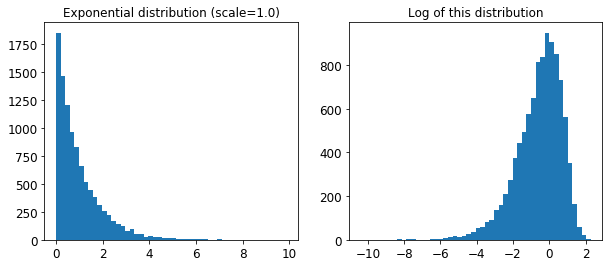

In [360]:
expon_distrib = expon(scale=1)
samples = expon_distrib.rvs(10000, random_state = 2019)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution used for `C` looks quite different: the scale of the samples is
    picked from a uniform distribution within a given range, which is why the right
    graph, which represents the log of the samples, looks roughly constant.
    This distribution is useful when you don't have a clue of what the target scale is: 

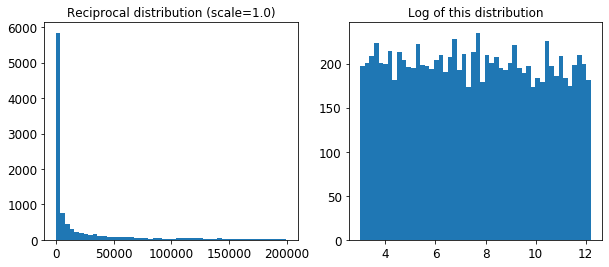

In [361]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.


## 3. Try adding a transformer in the preparation pipeline to select only the most important attributes

In [364]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k) [-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you already computed the feature
    importances somehow (for example using a `RandomForestRegressor`). You
    may be tempted to compute them directly in the `TopFeatureSelector`'s
    `fit()` method, however this would likely slow down grid/randomized search
    since the feature importances would have to be computed for every hyperparameter
    combination (unless you implement some sort of cache).
    
    
Let's define the number of top features we want to keep:

In [365]:
k = 5

In [366]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [367]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features

In [369]:
sorted(zip(feature_importances, attributes), reverse = True) [:k]

[(0.33446970918429003, 'median_income'),
 (0.14277071231976293, 'INLAND'),
 (0.10696985661074922, 'pop_per_hhold'),
 (0.07801188886133711, 'longitude'),
 (0.07609570881022078, 'bedrooms_per_room')]

Looking good...Now let's create a new pipeline that runs the previously defined
preparation pipeline, and adds top k feature selection:

In [370]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [373]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's loot at the features of the first 3 instances:

In [374]:
housing_prepared_top_k_features[0:3]

array([[ 0.82875658,  0.80586886,  0.05670416, -0.65982838,  0.        ],
       [-1.23341542,  0.31097621, -0.11587296,  1.29533369,  0.        ],
       [ 0.71890722, -0.69932496,  0.04988991,  0.29267009,  0.        ]])

Double check if these are indeed top features

In [375]:
housing_prepared[0:3, top_k_feature_indices]

array([[ 0.82875658,  0.80586886,  0.05670416, -0.65982838,  0.        ],
       [-1.23341542,  0.31097621, -0.11587296,  1.29533369,  0.        ],
       [ 0.71890722, -0.69932496,  0.04988991,  0.29267009,  0.        ]])

### 4. Try creating a single pipeline that does the full data preparation plus the final prediction

In [376]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [377]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

Let's try the full pipeline on a few instances:

In [378]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [219414.14043963 290151.04250263 154565.45977647  63127.47854972]
Labels:		 [213200.0, 367400.0, 191000.0, 51000.0]


Well, the full pipeline seems to work fine. Of course, the predictions 
are not fantastic: they would be better if we used the best `RandomForestRegressor`that we found earlier, rather than the best `SVR`.


## 5. Question: Automatically explore some preparation options using `GridSearchCV`.


In [379]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  13.8s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  13.6s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  13.8s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  13.4s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  13.9s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=  13.0s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=  13.7s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__

[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=  15.1s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=  16.1s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=  15.4s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=  15.4s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=  15.7s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=  15.4s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=

[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=   9.8s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=  11.9s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=   9.5s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  11.6s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  13.1s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  12.2s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature

[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  23.6s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  30.6s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  21.8s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  21.1s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  28.0s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=  25.7s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, p

[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  28.8s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  35.5s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total=  29.1s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  31.4s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  27.5s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=  28.4s
[CV] feature_selection__k=14, preparation__num__impute

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 145.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                     

In [380]:
grid_search_prep.best_params_

{'feature_selection__k': 11, 'preparation__num__imputer__strategy': 'mean'}